In [95]:
from __future__ import print_function
from collections import defaultdict
import numpy as np
import scipy as sp
import cPickle as pickle
import time
import os

data_root = os.path.expanduser("~") + '/data/CSE255/'
%matplotlib inline
import matplotlib.pyplot as plt

In [96]:
start_time = time.time()
all_data = pickle.load(open(data_root + "all_data.pickle", "rb"))
print(time.time() - start_time)

33.5860178471


In [97]:
all_size = len(all_data)
train_size = 900000
# train_size = all_size # uncomment this to produce test
valid_size = 100000
train_data = all_data[:train_size]
valid_data = all_data[all_size - valid_size:]

In [98]:
train_helpfuls = np.array([d['helpful']['nHelpful'] for d in train_data])
train_outofs =  np.array([d['helpful']['outOf'] for d in train_data])

In [140]:
outofs = sorted(list(set(train_outofs)))
outofs = outofs[1:]
outofs = np.array(outofs)

mean_helpfuls = [np.mean(train_helpfuls[train_outofs == outof]) for outof in outofs]
mean_helpfuls = np.array(mean_helpfuls)

# stats
ratios = mean_helpfuls / outofs
outofs_counts = np.array([(train_helpfuls[train_outofs == outof]).shape[0] for outof in outofs])

In [146]:
outofs

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

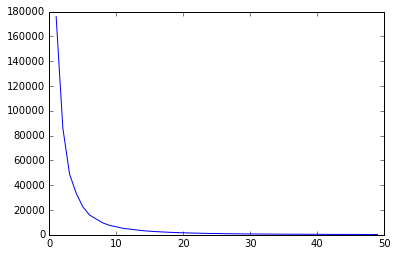

In [100]:
plt.plot(outofs[outofs < 50], outofs_counts[outofs < 50])

In [101]:
mean_helpfuls

array([  7.77026835e-01,   1.40273307e+00,   2.10141529e+00,
         2.81474508e+00,   3.54756381e+00,   4.29116466e+00,
         5.03623017e+00,   5.78291965e+00,   6.51887540e+00,
         7.28212680e+00,   8.10647262e+00,   8.85992986e+00,
         9.55085394e+00,   1.03121597e+01,   1.11151705e+01,
         1.18904649e+01,   1.25231379e+01,   1.34552314e+01,
         1.41936561e+01,   1.47905114e+01,   1.58142077e+01,
         1.63763278e+01,   1.74248531e+01,   1.82311234e+01,
         1.89447619e+01,   1.95351171e+01,   2.03542654e+01,
         2.15300896e+01,   2.19050992e+01,   2.24447592e+01,
         2.37572965e+01,   2.42748735e+01,   2.52254237e+01,
         2.57775701e+01,   2.69158111e+01,   2.72115385e+01,
         2.83677419e+01,   2.84049774e+01,   2.93390663e+01,
         3.12184466e+01,   3.16257143e+01,   3.26424051e+01,
         3.42012195e+01,   3.29007092e+01,   3.46993464e+01,
         3.57204301e+01,   3.57007576e+01,   3.73615385e+01,
         3.82788104e+01,

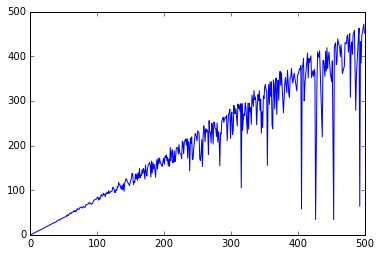

In [148]:
plt.plot(outofs[outofs < 500], mean_helpfuls[outofs < 500])

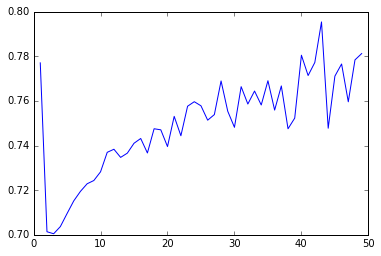

In [103]:
plt.plot(outofs[outofs < 50], ratios[outofs < 50])

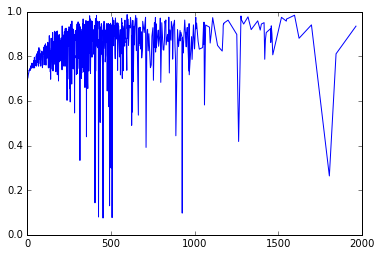

In [104]:
plt.plot(outofs[outofs < 2000], ratios[outofs < 2000])

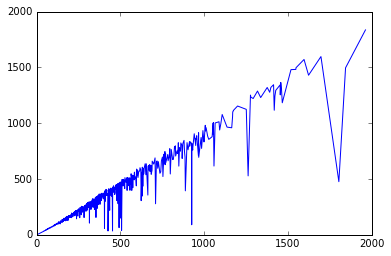

In [105]:
plt.plot(outofs[outofs < 2000], mean_helpfuls[outofs < 2000])

In [110]:
outofs[outofs < 2000]

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [114]:
ratios[outofs == 1805]

array([ 0.26371191])

In [115]:
for d in train_data:
    if int(d['helpful']['outOf']) == 1805:
        break

In [122]:
bad_collect = []
for d in train_data:
    if d['reviewerID'] == 'U690082877':
        bad_collect.append(d)

In [127]:
bad_outofs = [d['helpful']['outOf'] for d in bad_collect]
bad_helpfuls = [d['helpful']['nHelpful'] for d in bad_collect]

In [132]:
print(zip(bad_outofs, bad_helpfuls))

[(7, 4), (12, 10), (43, 25), (43, 25), (39, 26), (97, 88), (5, 3), (276, 238), (4, 2), (86, 81), (1, 1), (31, 21), (17, 13), (66, 56), (5, 4), (8, 7), (17, 17), (1, 1), (21, 20), (3, 3), (5, 3), (4, 4), (1, 1), (11, 11), (4, 3), (171, 121), (5, 5), (44, 22), (40, 32), (6, 6), (37, 22), (2, 2), (5, 5), (1, 1), (7, 6), (7, 6), (7, 6), (29, 13), (5, 4), (44, 36), (16, 10), (9, 7), (10, 9), (4, 4), (22, 20), (26, 14), (148, 140), (3, 1), (10, 9), (13, 11), (32, 29), (14, 12), (9, 4), (12, 9), (1805, 476), (4, 3), (51, 28), (3, 2), (50, 37), (0, 0), (61, 44), (3, 2), (525, 451), (6, 6), (1, 1), (28, 17), (21, 13), (8, 5), (6, 6), (14, 9), (186, 66), (487, 425), (6, 3), (18, 12), (66, 63), (52, 28), (79, 49), (15, 14), (8, 8), (17, 11), (3, 3), (4, 2), (157, 150), (3, 2), (771, 646), (5, 5), (29, 20), (90, 87), (4, 4), (173, 110), (9, 5)]


'U690082877'

In [133]:
# the max outof in test set is 2386

test_data = pickle.load(open(data_root + "helpful_data.pickle", "rb"))

outofs =  np.array([d['helpful']['outOf'] for d in test_data])

outofs = sorted(list(set(outofs)))
outofs = outofs[1:]
outofs = np.array(outofs)

outofs_counts = np.array([(train_helpfuls[train_outofs == outof]).shape[0] for outof in outofs])

print(outofs)

[   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16   17   18   19   20   21   22   23   24   25   26   27   28   29   30
   31   32   33   34   35   36   37   38   39   40   41   42   43   44   45
   46   47   48   49   50   51   52   53   54   55   56   57   58   59   60
   61   62   63   64   65   66   67   68   69   70   71   72   73   74   75
   76   77   78   79   80   81   82   83   84   85   86   87   88   89   90
   91   92   93   94   95   96   97   98   99  100  101  104  105  106  107
  108  109  111  112  114  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  139  140  141
  142  143  144  146  147  148  149  151  153  154  155  156  157  158  160
  161  163  164  165  166  168  170  171  174  175  177  178  179  186  187
  188  189  191  192  195  197  200  201  202  203  204  206  209  210  212
  214  218  221  222  224  227  230  238  239  241  244  246  248  255  259
  269  272  

In [137]:
for d in test_data:
    if d['reviewerID'] == 'U690082877':
        break

In [138]:
d

{'category': [['Books']],
 'helpful': {'outOf': 7},
 'itemID': 'I861095863',
 'rating': 5.0,
 'reviewText': 'This is a wonderful book about a very serious topic that too many people will misread.  Sowell is very clear about his topic and what he means by the word "intellectual" in his title.  No, it is not just about people who use their brains for a living.  For the purposes of this book he is examining the practices, claims, and effects of those whose main output is ideas and whose criteria of success rests in the approval and acclaim of their peers.  So, scientists who are measured against the data their experiments produce, doctors who are measured against their ability to objectively treat patients, and engineers who are judged by the success of their structures, machines, and the devices they create are not intellectuals for the purposes of this book.  They are very intelligent, to be sure, but their tie to objective measures is what is important.  So many professors, politicians

In [108]:
# outofs =  np.array([d['helpful']['outOf'] for d in valid_data])

# outofs = sorted(list(set(outofs)))
# outofs = outofs[1:]
# outofs = np.array(outofs)

# outofs_counts = np.array([(train_helpfuls[train_outofs == outof]).shape[0] for outof in outofs])

# print(outofs)